# Проверка гипотез

In [1]:
# Загрузим данные о продолжительности жизни в Азии и Европе в 2007 году

import plotly.express as px

df = px.data.gapminder()
data_2007 = df[df["year"] == 2007]

life_asia = data_2007[data_2007["continent"] == "Asia"]["lifeExp"].tolist()
life_europe = data_2007[data_2007["continent"] == "Europe"]["lifeExp"].tolist()


In [2]:
import math

def mean(values):
    return sum(values) / len(values)

def variance(values):
    mu = mean(values)
    return sum((x - mu) ** 2 for x in values) / (len(values) - 1)

def welch_t_stat(x1, x2):
    mean1, mean2 = mean(x1), mean(x2)
    var1, var2 = variance(x1), variance(x2)
    n1, n2 = len(x1), len(x2)
    
    numerator = mean1 - mean2
    denominator = math.sqrt(var1/n1 + var2/n2)
    return numerator / denominator


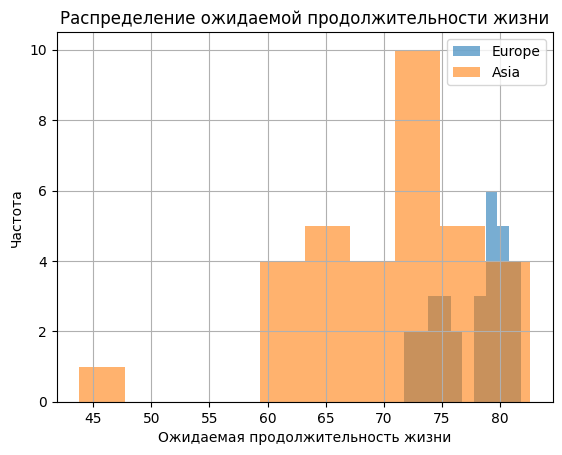

In [3]:
# А теперь рисуночки)
import matplotlib.pyplot as plt

plt.hist(life_europe, bins=10, alpha=0.6, label='Europe')
plt.hist(life_asia, bins=10, alpha=0.6, label='Asia')
plt.title('Распределение ожидаемой продолжительности жизни')
plt.xlabel('Ожидаемая продолжительность жизни')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()


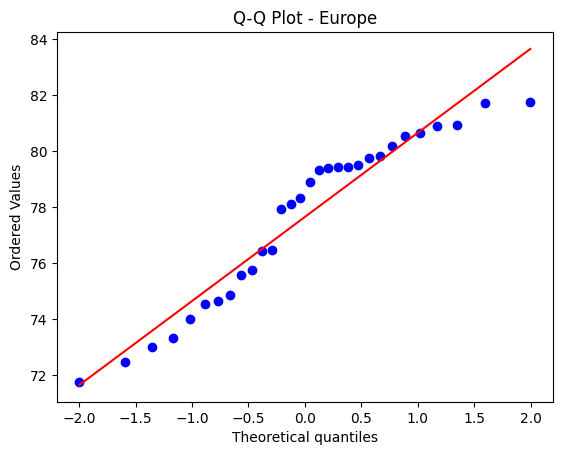

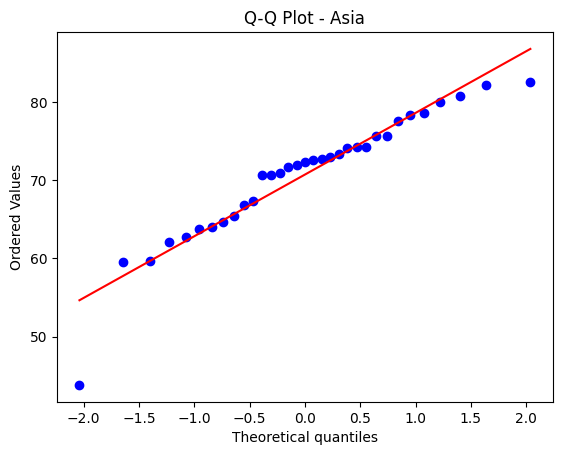

In [4]:
import scipy.stats as stats

stats.probplot(life_europe, dist="norm", plot=plt)
plt.title("Q-Q Plot - Europe")
plt.show()

stats.probplot(life_asia, dist="norm", plot=plt)
plt.title("Q-Q Plot - Asia")
plt.show()
